In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# 读取

In [2]:
xlsx = 'C:/Users/LuoZN/Desktop/客流数据/【客流+车场数据】0813.xlsx'

In [3]:
'/'.join(xlsx.split('/')[:-2])+'/heat.jpg'

'C:/Users/LuoZN/Desktop/heat.jpg'

### 出入口及通道日客流数

In [4]:
traffic_pathway_day = pd.read_excel(xlsx,'出入口及通道日客流数')
traffic_pathway_day.head(3)

,日期,广场级,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66
0,NaT,10号门,1AF1/2/3号客梯厅旁通道,1AF-11号通道,1AF-1号消防电梯厅,1AF-2号通道,1AF-3号通道,1AF-4号通道,1AF5号消防电梯厅,1AF6/7/8号客梯厅旁通道,...,UNIQLO外围通道,VERO MODA外围通道,宝贝王外围通道,宝贝王早教外围通道,大玩家外围通道,汉邦剪裁外围通道,苏宁外围通道,西面1AF至1BF楼梯通道,橡皮筋外围通道,星巴克外围通道
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-12-01,5338,107,3029,0,5567,5,2384,41,65,...,170,1,1496,26,6222,7,1133,348,8,1010


In [5]:
name_pathway = list(traffic_pathway_day.iloc[0])[1:]
name_pathway[:10]

['10号门',
 '1AF1/2/3号客梯厅旁通道',
 '1AF-11号通道',
 '1AF-1号消防电梯厅',
 '1AF-2号通道',
 '1AF-3号通道',
 '1AF-4号通道',
 '1AF5号消防电梯厅',
 '1AF6/7/8号客梯厅旁通道',
 '1AF-6号通道']

In [6]:
traffic_pathway_day = traffic_pathway_day[2:]
traffic_pathway_day['日期'] = pd.to_datetime(traffic_pathway_day['日期'])
traffic_pathway_day = traffic_pathway_day.set_index('日期',drop = True)
traffic_pathway_day.columns = [['广场级' for i in name_pathway],name_pathway]
traffic_pathway_day.head()

广场级                                                          \
            10号门 1AF1/2/3号客梯厅旁通道 1AF-11号通道 1AF-1号消防电梯厅 1AF-2号通道 1AF-3号通道   
日期                                                                         
2018-12-01  5338             107      3029           0     5567        5   
2018-12-02  3660             146      2442           6     5410       58   
2018-12-03  1625              15       644           8     1917       12   
2018-12-04  1507              16       506           1     1771       47   
2018-12-05  1097              42       499           4     1717       16   

                                                          ...               \
           1AF-4号通道 1AF5号消防电梯厅 1AF6/7/8号客梯厅旁通道 1AF-6号通道   ...   UNIQLO外围通道   
日期                                                        ...                
2018-12-01     2384         41              65       42   ...          170   
2018-12-02     2100         30               9       50   ...          172   
2018-12-03      283         20               3        4   ...          128   
2018-12-04      301         19               3       74   ...          148   
2018-12-05      216          9               0       54   ...          162   

                                                                    \
           VERO MODA外围通道 宝贝王外围通道 宝贝王早教外围通道 大玩家外围通道 汉邦剪裁外围通道 苏宁外围通道   
日期                                                                   
2018-12-01             1    1496        26    6222        7   1133   
2018-12-02             0    1510        40    5713        2    773   
2018-12-03             0     437        18    1398       18    338   
2018-12-04             1     272        21    1734       11    298   
2018-12-05             0     283        26    1439        7    264   

                                          
           西面1AF至1BF楼梯通道 橡皮筋外围通道 星巴克外围通道  
日期                                        
2018-12-01           348       8    1010  
2018-12-02           211       3     754  
2018-12-03           118       1     378  
2018-12-04           125       1     234  
2018-12-05           110       1     242  

[5 rows x 66 columns]

### 店铺日客流量

In [7]:
traffic_store_day= pd.read_excel(xlsx,'店铺日客流量')
traffic_store_day.head(3)

,日期,店铺级,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 273,Unnamed: 274,Unnamed: 275,Unnamed: 276,Unnamed: 277,Unnamed: 278,Unnamed: 279,Unnamed: 280,Unnamed: 281,Unnamed: 282
0,NaT,361°kids,3E.life,4cm,ABLE JEANS,adidas originals,AFU,ALDOLA,ALL SELF,ANTA,...,云启荟肌,赵肥肠,中国电信,中国黄金,中国移动智能体验店,众客优品,周大福,周大生,筑巢鸟生活,卓诗尼
1,NaT,2068,3072,1B015,1B050B,1A055,3067B,2051,1A066,"1B003,1B005",...,B1008,4003,B1022,"B1032,B1033",3037B,3078,1A037,1A036,2055,2007
2,2018-12-01,1904,892,1408,621,1138,837,1264,1697,6566,...,530,1408,2752,1978,2264,726,1651,1966,1817,1427


In [8]:
name_store = list(traffic_store_day.iloc[0,1:])
name_store[:10]

['361°kids',
 '3E.life',
 '4cm',
 'ABLE JEANS',
 'adidas originals',
 'AFU',
 'ALDOLA',
 'ALL SELF',
 'ANTA',
 'ANTA KIDS']

In [9]:
id_store = list(traffic_store_day.iloc[1,1:])
id_store = [i.split(',') for i in id_store]
id_store[:10]

[['2068'],
 ['3072'],
 ['1B015'],
 ['1B050B'],
 ['1A055'],
 ['3067B'],
 ['2051'],
 ['1A066'],
 ['1B003', '1B005'],
 ['2069', '2070']]

<center>dict_store_name_id</center>

| key | value |
| :---- | :---- |
| 店铺名称 | 店面id |
| balabala | ['2063', '2065', '2066B']| 

In [10]:
dict_store_name_id = dict(zip(name_store,id_store))
dict_store_name_id

{'361°kids': ['2068'],
 '3E.life': ['3072'],
 '4cm': ['1B015'],
 'ABLE JEANS': ['1B050B'],
 'adidas originals': ['1A055'],
 'AFU': ['3067B'],
 'ALDOLA': ['2051'],
 'ALL SELF': ['1A066'],
 'ANTA': ['1B003', '1B005'],
 'ANTA KIDS': ['2069', '2070'],
 'Apple': ['B1001'],
 'ARIOSE&YEARS': ['1A063'],
 'balabala': ['2063', '2065', '2066B'],
 'C+': ['4039'],
 'cabbeen': ['1B006'],
 'CAGO LIFE': ['3016', '3017', '3F-次主1B'],
 'Calvin Klein Jeans': ['1A039'],
 'Chic Passion': ['1B060B'],
 'CISSTEG': ['1B023B'],
 'CK PERFORMANCE': ['1A007'],
 'CK Underwear': ['1A052'],
 'coco都可': ['B1021'],
 'COSMO  LADY': ['2058'],
 'CRD': ['1A032'],
 'DBE': ['1A051'],
 'Diosa chocolate': ['2025'],
 'DUOZOULUMINI': ['1A016', '1A017A'],
 'ELLEBABY': ['2031'],
 'FILA': ['1A053'],
 'FILA FUSION': ['1A058'],
 'find钢琴智慧教室': ['3051A', '3051B'],
 'funlink+westlink集合店': ['1AF-次主2'],
 'FUN寿司': ['4015'],
 'GLORIA': ['1A061A', '1A061B', '1A061C'],
 'GUESS': ['1A005', '1A006'],
 'GXG': ['1B007'],
 'G大调': ['1A020'],
 'hely':

In [11]:
dict_store_id_name={}
for name,ids in dict_store_name_id.items() :
    for id_ in ids:
        dict_store_id_name[id_]=name
dict_store_id_name

{'2068': '361°kids',
 '3072': '3E.life',
 '1B015': '4cm',
 '1B050B': 'ABLE JEANS',
 '1A055': 'adidas originals',
 '3067B': 'AFU',
 '2051': 'ALDOLA',
 '1A066': 'ALL SELF',
 '1B003': 'ANTA',
 '1B005': 'ANTA',
 '2069': 'ANTA KIDS',
 '2070': 'ANTA KIDS',
 'B1001': 'Apple',
 '1A063': 'ARIOSE&YEARS',
 '2063': 'balabala',
 '2065': 'balabala',
 '2066B': 'balabala',
 '4039': 'C+',
 '1B006': 'cabbeen',
 '3016': 'CAGO LIFE',
 '3017': 'CAGO LIFE',
 '3F-次主1B': 'CAGO LIFE',
 '1A039': 'Calvin Klein Jeans',
 '1B060B': 'Chic Passion',
 '1B023B': 'CISSTEG',
 '1A007': 'CK PERFORMANCE',
 '1A052': 'CK Underwear',
 'B1021': 'coco都可',
 '2058': 'COSMO  LADY',
 '1A032': 'CRD',
 '1A051': 'DBE',
 '2025': 'Diosa chocolate',
 '1A016': 'DUOZOULUMINI',
 '1A017A': 'DUOZOULUMINI',
 '2031': 'ELLEBABY',
 '1A053': 'FILA',
 '1A058': 'FILA FUSION',
 '3051A': 'find钢琴智慧教室',
 '3051B': 'find钢琴智慧教室',
 '1AF-次主2': 'funlink+westlink集合店',
 '4015': 'FUN寿司',
 '1A061A': 'GLORIA',
 '1A061B': 'GLORIA',
 '1A061C': 'GLORIA',
 '1A005': 'GU

In [12]:
traffic_store_day = traffic_store_day[2:]
traffic_store_day['日期'] = pd.to_datetime(traffic_store_day['日期'])
traffic_store_day = traffic_store_day.set_index('日期',drop = True)
traffic_store_day.columns =[['店铺级' for i in name_store],name_store]
traffic_store_day.head()

店铺级                                                        \
           361°kids 3E.life   4cm ABLE JEANS adidas originals  AFU ALDOLA   
日期                                                                          
2018-12-01     1904     892  1408        621             1138  837   1264   
2018-12-02     1579     646  1506        521             1124  897   1109   
2018-12-03      200     293   305        191              270  158    353   
2018-12-04      167     217   414        199              210   68    256   
2018-12-05      172     229   271        115              206  230    152   

                                     ...                                    \
           ALL SELF  ANTA ANTA KIDS  ...  云启荟肌   赵肥肠  中国电信  中国黄金 中国移动智能体验店   
日期                                   ...                                     
2018-12-01     1697  6566      3663  ...   530  1408  2752  1978      2264   
2018-12-02     1547  5182      2905  ...   394  1317  2455  1855      1890   
2018-12-03      435   889       275  ...   322   519   633   402       591   
2018-12-04      272   539       295  ...   358   650   473   311       560   
2018-12-05      268   473       332  ...   401   433   444   393       437   

                                         
           众客优品   周大福   周大生 筑巢鸟生活   卓诗尼  
日期                                       
2018-12-01  726  1651  1966  1817  1427  
2018-12-02  435  1173  1281  2553  1260  
2018-12-03  234   291   394   366   245  
2018-12-04  146   228   389   196   255  
2018-12-05  195   197   401   119   174  

[5 rows x 282 columns]

### 停车入口日客流量

In [13]:
traffic_entry_parking_day= pd.read_excel(xlsx,'停车入口日客流量')
traffic_entry_parking_day.head(3)

,日期,停车场级,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaT,混进口,入口,双入口右,双入口左
1,NaT,NaN,NaN,NaN,NaN
2,2018-12-01,NaN,NaN,NaN,NaN


In [14]:
name_entry_parking = list(traffic_entry_parking_day.iloc[0,1:])
name_entry_parking[:10]

['混进口', '入口', '双入口右', '双入口左']

In [15]:
traffic_entry_parking_day = traffic_entry_parking_day[2:]
traffic_entry_parking_day['日期'] = pd.to_datetime(traffic_entry_parking_day['日期'])
traffic_entry_parking_day = traffic_entry_parking_day.set_index('日期',drop = True)
traffic_entry_parking_day.columns = [['停车场级' for i in name_entry_parking],name_entry_parking]
traffic_entry_parking_day.tail()

停车场级                
            混进口    入口 双入口右 双入口左
日期                             
2019-03-27  150   610  200    4
2019-03-28  205   594  233    5
2019-03-29  208   621  294    9
2019-03-30  283  1110  533   38
2019-03-31  243   915  524   41

### 合并日客流量

In [16]:
traffic_day = pd.concat([traffic_pathway_day,traffic_store_day,traffic_entry_parking_day], axis=1)
traffic_day.head()

广场级                                                          \
            10号门 1AF1/2/3号客梯厅旁通道 1AF-11号通道 1AF-1号消防电梯厅 1AF-2号通道 1AF-3号通道   
日期                                                                         
2018-12-01  5338             107      3029           0     5567        5   
2018-12-02  3660             146      2442           6     5410       58   
2018-12-03  1625              15       644           8     1917       12   
2018-12-04  1507              16       506           1     1771       47   
2018-12-05  1097              42       499           4     1717       16   

                                                        ...        店铺级       \
           1AF-4号通道 1AF5号消防电梯厅 1AF6/7/8号客梯厅旁通道 1AF-6号通道 ...  中国移动智能体验店 众客优品   
日期                                                      ...                   
2018-12-01     2384         41              65       42 ...       2264  726   
2018-12-02     2100         30               9       50 ...       1890  435   
2018-12-03      283         20               3        4 ...        591  234   
2018-12-04      301         19               3       74 ...        560  146   
2018-12-05      216          9               0       54 ...        437  195   

                                   停车场级                 
             周大福   周大生 筑巢鸟生活   卓诗尼  混进口   入口 双入口右 双入口左  
日期                                                      
2018-12-01  1651  1966  1817  1427  NaN  NaN  NaN  NaN  
2018-12-02  1173  1281  2553  1260  NaN  NaN  NaN  NaN  
2018-12-03   291   394   366   245  NaN  NaN  NaN  NaN  
2018-12-04   228   389   196   255  NaN  NaN  NaN  NaN  
2018-12-05   197   401   119   174  NaN  NaN  NaN  NaN  

[5 rows x 352 columns]

### 分时段客流数

In [17]:
traffic_hour= pd.read_excel(xlsx,'分时段客流数')
traffic_hour.head()

,日期,时段,广场级,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 323,Unnamed: 324,Unnamed: 325,Unnamed: 326,Unnamed: 327,Unnamed: 328,停车场级,Unnamed: 330,Unnamed: 331,Unnamed: 332
0,NaT,NaN,10号门,1AF1/2/3号客梯厅旁通道,1AF-11号通道,1AF-1号消防电梯厅,1AF-2号通道,1AF-3号通道,1AF-4号通道,1AF5号消防电梯厅,...,中国黄金,中国移动智能体验店,周大福,周大生,筑巢鸟生活,卓诗尼,混进口,入口,双入口右,双入口左
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"B1032,B1033",3037B,1A037,1A036,2055,2007,NaN,NaN,NaN,NaN
2,2019-03-01,10：00-11：00,37,2,18,0,19,2,1,0,...,17,15,8,15,12,2,6,28,11,0
3,NaT,11：00-12：00,60,3,8,0,29,0,1,0,...,11,19,3,12,4,7,5,40,14,0
4,NaT,12：00-13：00,80,1,8,0,19,0,9,0,...,15,24,2,12,4,7,12,30,15,0


In [18]:
temp = list(traffic_hour['日期'])[2:]
date =[]
for i in temp:
    if i == i: date.append(i)
    else: date.append(date[-1])

time = list(traffic_hour['时段'])[2:]

temp = list(traffic_hour.columns)[2:]
level =[]
for i in temp:
    if i[:7]=='Unnamed': level.append(level[-1])
    else: level.append(i)

name = list(traffic_hour.iloc[0,2:])
print(date[:10] , time[:10] , level[:10] , name[:10])

[Timestamp('2019-03-01 00:00:00'), Timestamp('2019-03-01 00:00:00'), Timestamp('2019-03-01 00:00:00'), Timestamp('2019-03-01 00:00:00'), Timestamp('2019-03-01 00:00:00'), Timestamp('2019-03-01 00:00:00'), Timestamp('2019-03-01 00:00:00'), Timestamp('2019-03-01 00:00:00'), Timestamp('2019-03-01 00:00:00'), Timestamp('2019-03-01 00:00:00')] ['10：00-11：00', '11：00-12：00', '12：00-13：00', '13：00-14：00', '14：00-15：00', '15：00-16：00', '16：00-17：00', '17：00-18：00', '18：00-19：00', '19：00-20：00'] ['广场级', '广场级', '广场级', '广场级', '广场级', '广场级', '广场级', '广场级', '广场级', '广场级'] ['10号门', '1AF1/2/3号客梯厅旁通道', '1AF-11号通道', '1AF-1号消防电梯厅', '1AF-2号通道', '1AF-3号通道', '1AF-4号通道', '1AF5号消防电梯厅', '1AF6/7/8号客梯厅旁通道', '1AF-6号通道']


In [19]:
traffic_hour = traffic_hour.iloc[2:,2:]
traffic_hour =traffic_hour.set_index([date,time])
traffic_hour.columns = [level,name]
traffic_hour

广场级                                                 \
                       10号门 1AF1/2/3号客梯厅旁通道 1AF-11号通道 1AF-1号消防电梯厅 1AF-2号通道   
2019-03-01 10：00-11：00   37               2        18           0       19   
           11：00-12：00   60               3         8           0       29   
           12：00-13：00   80               1         8           0       19   
           13：00-14：00   62               0        10           0       22   
           14：00-15：00   75               1         8           0       29   
           15：00-16：00   34               2         8           0       32   
           16：00-17：00   69               2        18           0       19   
           17：00-18：00   49               1        12           0       24   
           18：00-19：00   52               0        16           0       14   
           19：00-20：00   77               0         7           0       14   
           20：00-21：00   30               0         5           0        5   
           21：00-22：00   17               2         3           1       16   
2019-03-02 10：00-11：00   47               1         8           0       26   
           11：00-12：00   56               1        11           0       27   
           12：00-13：00   57               1        10           0       27   
           13：00-14：00   89               1        12           0       11   
           14：00-15：00  118               0        15           1       29   
           15：00-16：00   75               1        15           0       18   
           16：00-17：00   70               3        30           0       14   
           17：00-18：00   90               0         9           1       12   
           18：00-19：00   80               0        20           0       14   
           19：00-20：00   79               5         8           0        5   
           20：00-21：00   33               7         7           1        5   
           21：00-22：00   39               6         8           1        2   
2019-03-03 10：00-11：00   55               2        13           1       18   
           11：00-12：00   69               0         7           0       28   
           12：00-13：00   99               0        20           0       12   
           13：00-14：00   77               1        25           1       27   
           14：00-15：00   99               4         9           0       45   
           15：00-16：00  118               0        28           0       38   
...                     ...             ...       ...         ...      ...   
2019-03-29 16：00-17：00   41               2        28           0       11   
           17：00-18：00   29               0        23           0       19   
           18：00-19：00   51               1        19           0       19   
           19：00-20：00   45               0        19           0       10   
           20：00-21：00   24               0        24           0       17   
           21：00-22：00   24               0         0           0        6   
2019-03-30 10：00-11：00   34               0        23           0       35   
           11：00-12：00   51               1        24           0       15   
           12：00-13：00   48               1        37           0       27   
           13：00-14：00   35               0        22           0       21   
           14：00-15：00   63               1        12           0       28   
           15：00-16：00   42               1        13           0       17   
           16：00-17：00   73               0        14           0       25   
           17：00-18：00   60               0        16           0       15   
           18：00-19：00   48               5        22           0       12   
           19：00-20：00   47               1        21           0        5   
           20：00-21：00   23               1        13           0        9   
           21：00-22：00   24               0         2           0       15   
2019-03-31 10：00-11：00   35               0   

### 计算指标

##### 标准化店铺日客流

In [20]:
traffic_store_day = traffic_day.loc[:]['店铺级'].fillna(0)
ratio_store_day = traffic_store_day.div(traffic_store_day.sum(axis = 1),axis = 0)
ratio_store_day

,361°kids,3E.life,4cm,ABLE JEANS,adidas originals,AFU,ALDOLA,ALL SELF,ANTA,ANTA KIDS,...,云启荟肌,赵肥肠,中国电信,中国黄金,中国移动智能体验店,众客优品,周大福,周大生,筑巢鸟生活,卓诗尼
日期,,,,,,,,,,,,,,,,,,,,,
2018-12-01,0.002264,0.001061,0.001674,0.000738,0.001353,0.000995,0.001503,0.002018,0.007808,0.004356,...,0.000630,0.001674,0.003273,0.002352,0.002692,0.000863,0.001963,0.002338,0.002161,0.001697
2018-12-02,0.002198,0.000899,0.002097,0.000725,0.001565,0.001249,0.001544,0.002154,0.007214,0.004044,...,0.000549,0.001833,0.003418,0.002582,0.002631,0.000606,0.001633,0.001783,0.003554,0.001754
2018-12-03,0.000945,0.001384,0.001441,0.000902,0.001275,0.000746,0.001667,0.002055,0.004199,0.001299,...,0.001521,0.002451,0.002990,0.001899,0.002791,0.001105,0.001374,0.001861,0.001729,0.001157
2018-12-04,0.001054,0.001369,0.002613,0.001256,0.001325,0.000429,0.001616,0.001717,0.003402,0.001862,...,0.002259,0.004102,0.002985,0.001963,0.003534,0.000921,0.001439,0.002455,0.001237,0.001609
2018-12-05,0.001279,0.001703,0.002015,0.000855,0.001532,0.001710,0.001130,0.001993,0.003517,0.002469,...,0.002982,0.003220,0.003301,0.002922,0.003249,0.001450,0.001465,0.002982,0.000885,0.001294
2018-12-06,0.001210,0.001378,0.001906,0.001110,0.001118,0.000383,0.000934,0.001669,0.002297,0.001868,...,0.001968,0.002963,0.003805,0.002128,0.003315,0.001156,0.001248,0.002098,0.000704,0.001057
2018-12-07,0.001268,0.000997,0.002113,0.001035,0.001463,0.000814,0.001117,0.001609,0.002864,0.002101,...,0.002845,0.003375,0.003097,0.001325,0.002769,0.001098,0.000990,0.002429,0.000662,0.001545
2018-12-08,0.001400,0.001174,0.001625,0.000789,0.001075,0.000614,0.000846,0.001204,0.003178,0.002435,...,0.001118,0.003121,0.001662,0.001808,0.002468,0.001015,0.000786,0.001944,0.000726,0.001410
2018-12-09,0.001231,0.001149,0.001462,0.000914,0.000964,0.000708,0.000797,0.001309,0.003511,0.002572,...,0.001046,0.002682,0.004440,0.001437,0.002789,0.001096,0.000968,0.001889,0.000790,0.001231


In [21]:
csv_path = 'C:/Users/LuoZN/Desktop/客流数据/wanda-traffic/lisp/B1F.csv'
f = open(csv_path)
csv = pd.read_csv(f,header=None)
f.close()

def fixstr(s):
    l = s[5:].split(' : ((')
    l[0]=l[0].split(' ')[-1]
    l[0]=l[0].split('-')
    l[1]= l[1].split(') (')
    l[1][-1] = l[1][-1].split(') ')[0]
    l[1] = [[float(i.split(' ')[0]), float(i.split(' ')[1])] for i in l[1]]
    return l


temp = csv[0].apply(fixstr)


csv[0] = [i[0] for i in temp]
csv[1] = [i[1] for i in temp]
csv.head()

,0,1
0,[B1038],"[[2044360.0, 6804190.0], [2041530.0, 6802230.0..."
1,[B1037],"[[2044020.0, 6792600.0], [2048500.0, 6786130.0..."
2,[B1036],"[[2050910.0, 6797370.0], [2051630.0, 6797870.0..."
3,[B1035],"[[2066990.0, 6799550.0], [2065910.0, 6801100.0..."
4,[B1001],"[[2045880.0, 6772910.0], [2045890.0, 6769940.0..."


In [64]:
#dict_store_id_name,dict_store_name_id
store_name= []
for i in list(csv[0]):
    try:
        print(dict_store_id_name[i[0]])
        store_name.append(dict_store_id_name[i[0]])
    except:
        print(i[0])
        store_name.append(i[0])
heat = csv
heat['name']=store_name
heat.head(10)

KFC
安菲娅糖果铺
面包新语
酷乐潮玩
Apple
永辉绿标店
名创优品
良品铺子
NOME
优棉莫待
云启荟肌
唯美度
尚谷
廖记棒棒鸡
三顾冒菜
小涮哥
八方渔蛋
仇婆抄手
莱得快
厨人艺料·冷锅串串+火锅米线
奇耙牛肉面
coco都可
中国电信
华伦天奴·奥兰迪
美美袜铺
维纳贝拉
娇兰佳人
九东潮妆
樊文花
珞臻珍珠
觅优生活
中国黄金
中国黄金
妮可美甲


,0,1,name,2018-12-01 00:00:00,2018-12-02 00:00:00,2018-12-03 00:00:00,2018-12-04 00:00:00,2018-12-05 00:00:00,2018-12-06 00:00:00,2018-12-07 00:00:00,...,2019-03-22 00:00:00,2019-03-23 00:00:00,2019-03-24 00:00:00,2019-03-25 00:00:00,2019-03-26 00:00:00,2019-03-27 00:00:00,2019-03-28 00:00:00,2019-03-29 00:00:00,2019-03-30 00:00:00,2019-03-31 00:00:00
0,[B1038],"[[2044360.0, 6804190.0], [2041530.0, 6802230.0...",KFC,3200,3022,517,461,369,271,359,...,324,448,693,316,267,228,317,326,540,593
1,[B1037],"[[2044020.0, 6792600.0], [2048500.0, 6786130.0...",安菲娅糖果铺,1014,767,172,157,113,71,113,...,116,81,173,83,119,104,88,111,181,149
2,[B1036],"[[2050910.0, 6797370.0], [2051630.0, 6797870.0...",面包新语,9470,8022,3095,2882,2126,1697,1873,...,858,1063,1205,619,635,539,474,615,1101,1074
3,[B1035],"[[2066990.0, 6799550.0], [2065910.0, 6801100.0...",酷乐潮玩,7466,5531,1644,1141,904,950,1193,...,610,962,690,501,473,333,424,587,859,987
4,[B1001],"[[2045880.0, 6772910.0], [2045890.0, 6769940.0...",Apple,1767,1452,397,456,255,212,194,...,150,150,135,86,104,102,105,92,138,112
5,[永辉绿标店],"[[2154390.0, 6865940.0], [2139630.0, 6859180.0...",永辉绿标店,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
6,[B1002],"[[2082870.0, 6789530.0], [2080160.0, 6789540.0...",名创优品,3614,3034,1158,916,735,616,820,...,400,630,682,360,400,344,351,509,726,718
7,[B1003],"[[2100920.0, 6789460.0], [2096590.0, 6789440.0...",良品铺子,3505,2534,879,676,691,423,500,...,500,662,639,347,445,522,532,404,701,594
8,[B1005],"[[2125630.0, 6789440.0], [2108090.0, 6789440.0...",NOME,7537,6268,1498,2792,3513,9792,12989,...,533,950,1049,665,439,488,543,470,1004,1245
9,[B1006],"[[2125630.0, 6784640.0], [2125630.0, 6789440.0...",优棉莫待,521,418,147,146,143,88,116,...,99,119,108,134,211,157,101,106,177,183


In [29]:
traffic_store_day.head()

,361°kids,3E.life,4cm,ABLE JEANS,adidas originals,AFU,ALDOLA,ALL SELF,ANTA,ANTA KIDS,...,云启荟肌,赵肥肠,中国电信,中国黄金,中国移动智能体验店,众客优品,周大福,周大生,筑巢鸟生活,卓诗尼
日期,,,,,,,,,,,,,,,,,,,,,
2018-12-01,1904,892,1408,621,1138,837,1264,1697,6566,3663,...,530,1408,2752,1978,2264,726,1651,1966,1817,1427
2018-12-02,1579,646,1506,521,1124,897,1109,1547,5182,2905,...,394,1317,2455,1855,1890,435,1173,1281,2553,1260
2018-12-03,200,293,305,191,270,158,353,435,889,275,...,322,519,633,402,591,234,291,394,366,245
2018-12-04,167,217,414,199,210,68,256,272,539,295,...,358,650,473,311,560,146,228,389,196,255
2018-12-05,172,229,271,115,206,230,152,268,473,332,...,401,433,444,393,437,195,197,401,119,174


In [63]:
for i in range(len(traffic_store_day)):
    traffic_store=[]
    for name in store_name:
        try:
            traffic_store.append(traffic_store_day.iloc[i][name])
        except:
            traffic_store.append(-1)
    heat[traffic_store_day.index[i]]=traffic_store
heat
        

,0,1,name,2018-12-01 00:00:00,2018-12-02 00:00:00,2018-12-03 00:00:00,2018-12-04 00:00:00,2018-12-05 00:00:00,2018-12-06 00:00:00,2018-12-07 00:00:00,...,2019-03-22 00:00:00,2019-03-23 00:00:00,2019-03-24 00:00:00,2019-03-25 00:00:00,2019-03-26 00:00:00,2019-03-27 00:00:00,2019-03-28 00:00:00,2019-03-29 00:00:00,2019-03-30 00:00:00,2019-03-31 00:00:00
0,[B1038],"[[2044360.0, 6804190.0], [2041530.0, 6802230.0...",KFC,3200,3022,517,461,369,271,359,...,324,448,693,316,267,228,317,326,540,593
1,[B1037],"[[2044020.0, 6792600.0], [2048500.0, 6786130.0...",安菲娅糖果铺,1014,767,172,157,113,71,113,...,116,81,173,83,119,104,88,111,181,149
2,[B1036],"[[2050910.0, 6797370.0], [2051630.0, 6797870.0...",面包新语,9470,8022,3095,2882,2126,1697,1873,...,858,1063,1205,619,635,539,474,615,1101,1074
3,[B1035],"[[2066990.0, 6799550.0], [2065910.0, 6801100.0...",酷乐潮玩,7466,5531,1644,1141,904,950,1193,...,610,962,690,501,473,333,424,587,859,987
4,[B1001],"[[2045880.0, 6772910.0], [2045890.0, 6769940.0...",Apple,1767,1452,397,456,255,212,194,...,150,150,135,86,104,102,105,92,138,112
5,[永辉绿标店],"[[2154390.0, 6865940.0], [2139630.0, 6859180.0...",永辉绿标店,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
6,[B1002],"[[2082870.0, 6789530.0], [2080160.0, 6789540.0...",名创优品,3614,3034,1158,916,735,616,820,...,400,630,682,360,400,344,351,509,726,718
7,[B1003],"[[2100920.0, 6789460.0], [2096590.0, 6789440.0...",良品铺子,3505,2534,879,676,691,423,500,...,500,662,639,347,445,522,532,404,701,594
8,[B1005],"[[2125630.0, 6789440.0], [2108090.0, 6789440.0...",NOME,7537,6268,1498,2792,3513,9792,12989,...,533,950,1049,665,439,488,543,470,1004,1245
9,[B1006],"[[2125630.0, 6784640.0], [2125630.0, 6789440.0...",优棉莫待,521,418,147,146,143,88,116,...,99,119,108,134,211,157,101,106,177,183


In [70]:
heat[pd.to_datetime('2018-12-01')]

0     3200
1     1014
2     9470
3     7466
4     1767
5       -1
6     3614
7     3505
8     7537
9      521
10     530
11    1275
12    5399
13       0
14    1749
15    1147
16    1581
17     350
18    2374
19     326
20     511
21    3561
22    2752
23    4189
24     186
25     147
26    5848
27    2027
28     359
29     159
30    1606
31    1978
32    1978
33     566
Name: 2018-12-01 00:00:00, dtype: int64

In [31]:
pls= []
for pl in list(heat[1]):
    li = []
    for p in range(len(pl)-1):
        li.append([pl[p],pl[p+1]])
    li.append([pl[-1],pl[0]])
    pls.append(li)
pls[:2]

[[[[2044360.0, 6804190.0], [2041530.0, 6802230.0]],
  [[2041530.0, 6802230.0], [2038700.0, 6800270.0]],
  [[2038700.0, 6800270.0], [2036350.0, 6797920.0]],
  [[2036350.0, 6797920.0], [2034620.0, 6795040.0]],
  [[2034620.0, 6795040.0], [2034540.0, 6794860.0]],
  [[2034540.0, 6794860.0], [2033250.0, 6791060.0]],
  [[2033250.0, 6791060.0], [2032860.0, 6788310.0]],
  [[2032860.0, 6788310.0], [2032850.0, 6786050.0]],
  [[2032850.0, 6786050.0], [2033200.0, 6783470.0]],
  [[2033200.0, 6783470.0], [2034360.0, 6783540.0]],
  [[2034360.0, 6783540.0], [2034990.0, 6783600.0]],
  [[2034990.0, 6783600.0], [2035580.0, 6783660.0]],
  [[2035580.0, 6783660.0], [2036910.0, 6783780.0]],
  [[2036910.0, 6783780.0], [2037910.0, 6783910.0]],
  [[2037910.0, 6783910.0], [2038790.0, 6784040.0]],
  [[2038790.0, 6784040.0], [2039740.0, 6784170.0]],
  [[2039740.0, 6784170.0], [2041380.0, 6784440.0]],
  [[2041380.0, 6784440.0], [2043150.0, 6784750.0]],
  [[2043150.0, 6784750.0], [2043850.0, 6784890.0]],
  [[2043850.

In [42]:
import numpy as np
np.random.rand(5, 2)
np.array(boundaries[0])

array([[2044360., 6804190.],
       [2041530., 6802230.],
       [2038700., 6800270.],
       [2036350., 6797920.],
       [2034620., 6795040.],
       [2034540., 6794860.],
       [2033250., 6791060.],
       [2032860., 6788310.],
       [2032850., 6786050.],
       [2033200., 6783470.],
       [2034360., 6783540.],
       [2034990., 6783600.],
       [2035580., 6783660.],
       [2036910., 6783780.],
       [2037910., 6783910.],
       [2038790., 6784040.],
       [2039740., 6784170.],
       [2041380., 6784440.],
       [2043150., 6784750.],
       [2043850., 6784890.],
       [2044230., 6784960.],
       [2044590., 6785040.],
       [2045070., 6785130.],
       [2045490., 6785220.],
       [2045880., 6785300.],
       [2046220., 6785380.],
       [2046730., 6785490.],
       [2046620., 6785930.],
       [2048070., 6786320.],
       [2048170., 6785940.],
       [2048520., 6786070.],
       [2048500., 6786130.],
       [2044020., 6792600.],
       [2051630., 6797870.],
       [205093

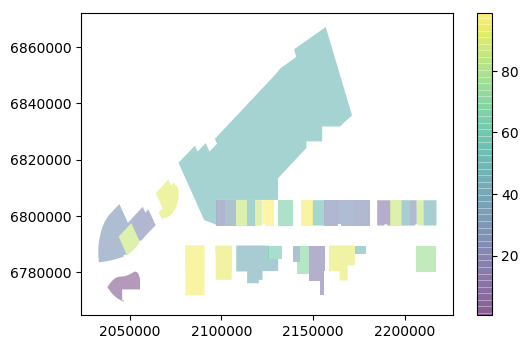

In [62]:
import numpy as np
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt

figure, ax = plt.subplots(dpi=100)
boundaries =list(heat[1])
patches =[]
for boundary in boundaries:
    polygon = Polygon(np.array(boundary), True)
    patches.append(polygon)
    (lwpl_xs, lwpl_ys) = zip(*boundary)
    
colors = 100*np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.4)
p.set_array(np.array(colors))
ax.add_collection(p)

figure.colorbar(p, ax=ax)
plt.plot()
plt.show()

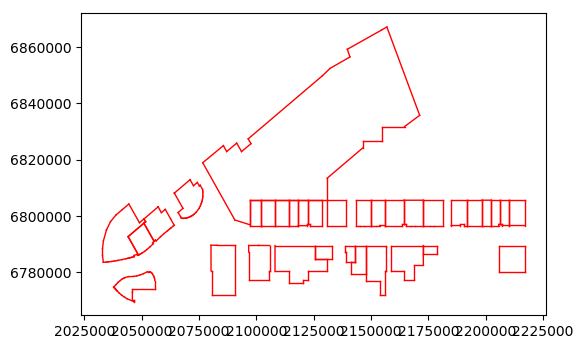

In [58]:
from matplotlib.lines import Line2D
from matplotlib.patches import Arc
import matplotlib.pyplot as plt

figure, ax = plt.subplots(dpi=100)
for pl in pls:
    lwpl_xs = [0]*len(pl)
    lwpl_ys = [0]*len(pl)
    for i in range(len(pl)):
        (lwpl_xs[i], lwpl_ys[i]) = zip(*pl[i])
    for i in range(len(lwpl_xs)):
        ax.add_line(Line2D(lwpl_xs[i], lwpl_ys[i], linewidth=1, color='red'))
plt.plot()
plt.show()

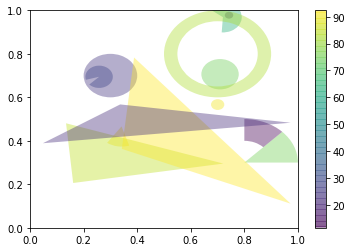

In [55]:
import numpy as np
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


fig, ax = plt.subplots()

resolution = 50  # the number of vertices
N = 3
x = np.random.rand(N)
y = np.random.rand(N)
radii = 0.1*np.random.rand(N)
patches = []
for x1, y1, r in zip(x, y, radii):
    circle = Circle((x1, y1), r)
    patches.append(circle)

x = np.random.rand(N)
y = np.random.rand(N)
radii = 0.1*np.random.rand(N)
theta1 = 360.0*np.random.rand(N)
theta2 = 360.0*np.random.rand(N)
for x1, y1, r, t1, t2 in zip(x, y, radii, theta1, theta2):
    wedge = Wedge((x1, y1), r, t1, t2)
    patches.append(wedge)

# Some limiting conditions on Wedge
patches += [
    Wedge((.3, .7), .1, 0, 360),             # Full circle
    Wedge((.7, .8), .2, 0, 360, width=0.05),  # Full ring
    Wedge((.8, .3), .2, 0, 45),              # Full sector
    Wedge((.8, .3), .2, 45, 90, width=0.10),  # Ring sector
]

for i in range(N):
    polygon = Polygon(np.random.rand(N, 2), True)
    patches.append(polygon)

colors = 100*np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.4)
p.set_array(np.array(colors))
ax.add_collection(p)
fig.colorbar(p, ax=ax)

plt.show()

In [65]:
import os 

In [68]:
os.startfile('c:\Users\LuoZN\Desktop\客流数据\wanda-traffic\heat.jpg')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-68-0176e81018fc>, line 1)